In [ ]:
# Load libraries

import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
data = pd.read_csv("Cancer_Data.csv")

X = data.iloc[:, 1:31] 

y = data.iloc[:, 0]

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)
importances = tree.feature_importances_
sorted_importances = sorted(zip(importances, X.columns), reverse=True)
for importance, feature in sorted_importances:
    print(f"{feature}: {importance}")

# Create a mask to select the features with importance > 0.1
mask = importances > 0.01

# Select the features based on the mask
selected_features = X.loc[:, mask]

X = selected_features

# Retrieve the feature names
feature_names = X.columns.tolist()

# Print the feature names
print(feature_names)


radius_worst: 0.6955935182252059
concave points_worst: 0.10709687876817764
texture_worst: 0.08372821940254928
concavity_se: 0.03184137139872597
s1oothness_worst: 0.01440487734312915
co1pactness_1ean: 0.012530169300424571
texture_1ean: 0.011277152370382114
area_worst: 0.011085902417901953
area_se: 0.00936121243059898
concave points_1ean: 0.0087711185102972
concavity_worst: 0.007667163522737443
s1oothness_1ean: 0.005638576185191057
s1oothness_se: 0.0010038401246787547
texture_se: 0.0
sy11etry_worst: 0.0
sy11etry_se: 0.0
sy11etry_1ean: 0.0
radius_se: 0.0
radius_1ean: 0.0
peri1eter_worst: 0.0
peri1eter_se: 0.0
peri1eter_1ean: 0.0
fractal_di1ension_worst: 0.0
fractal_di1ension_se: 0.0
fractal_di1ension_1ean: 0.0
concavity_1ean: 0.0
concave points_se: 0.0
co1pactness_worst: 0.0
co1pactness_se: 0.0
area_1ean: 0.0
['texture_1ean', 'co1pactness_1ean', 'concavity_se', 'radius_worst', 'texture_worst', 'area_worst', 's1oothness_worst', 'concave points_worst']


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

NameError: ignored

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9532163742690059


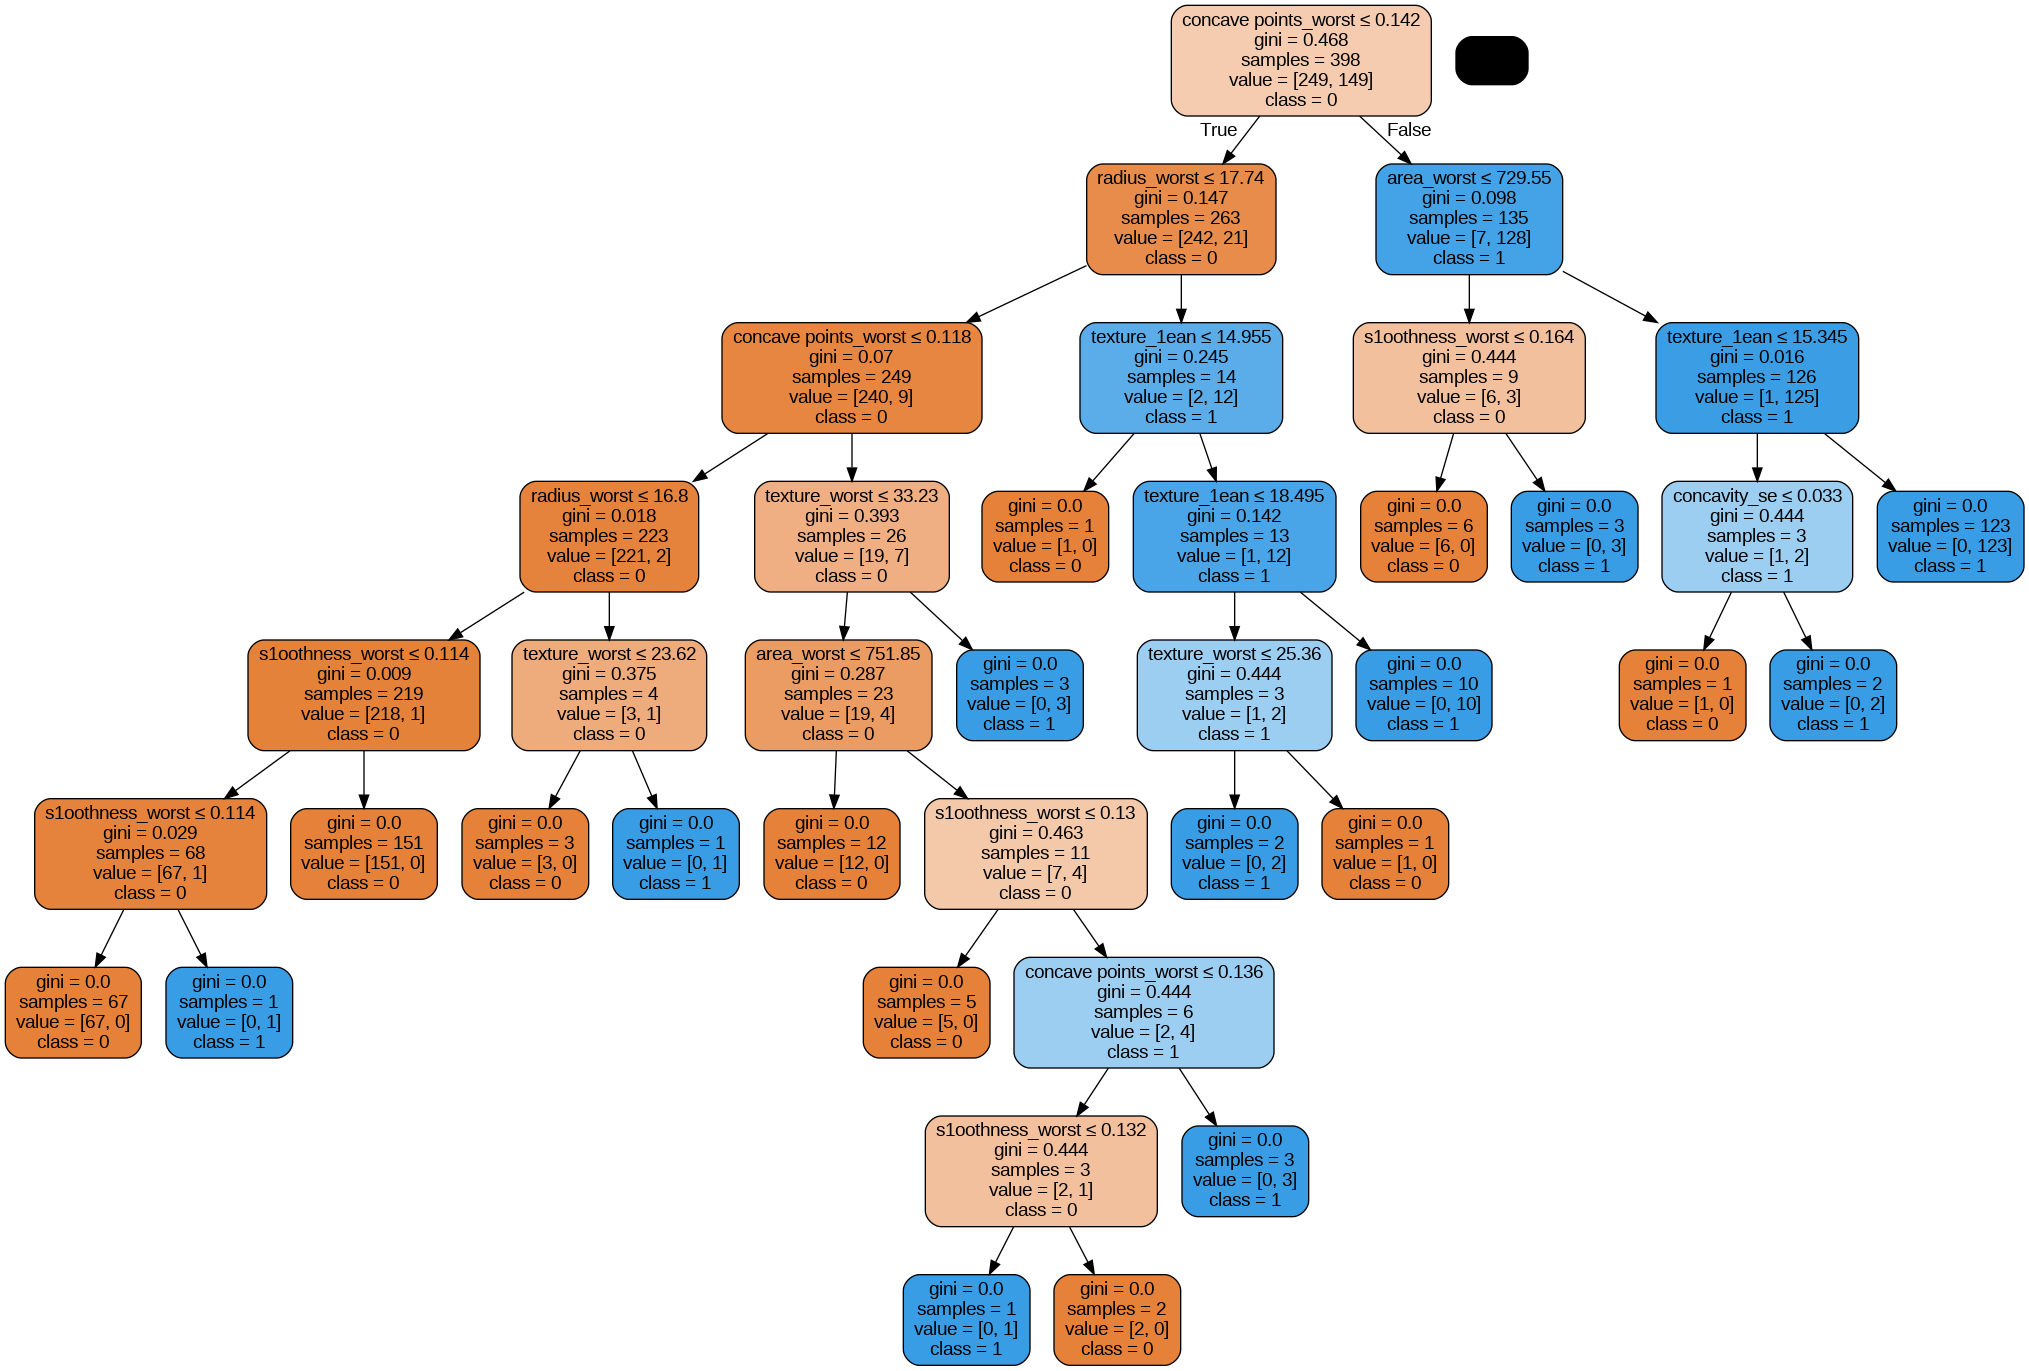

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('cancers.png')
Image(graph.create_png())